In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import re

In [3]:
# prompt: load the job.csv


df = pd.read_csv('/content/jobs.csv')
df.head()


,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...


**1. Fix column typo**

In [4]:
df.rename(columns={'resposibilities': 'responsibilities'}, inplace=True)

**2. Handle missing values**

In [ ]:
df.dropna(subset=['job_id', 'company'], inplace=True)

In [6]:

df['experience'].fillna('Not specified', inplace=True)
df['location'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['reviews'].fillna('0 reviews', inplace=True)

<ipython-input-6-d6ba60f23454>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)


**3. Parse 'experience' **

In [11]:

def parse_experience(exp):
    if 'Yrs' in exp:
        years = re.findall(r'\d+', exp)
        if len(years) == 1:
            return int(years[0]), int(years[0])
        elif len(years) == 2:
            return int(years[0]), int(years[1])
    return np.nan, np.nan

df[['exp_min', 'exp_max']] = df['experience'].apply(lambda x: pd.Series(parse_experience(x)))



4. Normalize 'salary'

In [19]:
# === 4. Normalize 'salary' ===

def parse_salary(sal):
    # Handle NaN values first
    if pd.isna(sal):
        return np.nan, np.nan

    # Convert to string to handle cases like 'Not disclosed'
    sal_str = str(sal)

    if 'not disclosed' in sal_str.lower():
        return np.nan, np.nan

    # Continue with parsing logic on the string
    sal_str = sal_str.replace(',', '').replace('₹', '').lower()
    match = re.findall(r'(\d+)[\s\-to]*?(\d+)?', sal_str)
    if match:
        low = int(match[0][0])
        high = int(match[0][1]) if match[0][1] else int(match[0][0])
        # Assuming all salaries are per annum (if unit info exists, modify this)
        return low, high
    return np.nan, np.nan

df[['salary_min', 'salary_max']] = df['salary'].apply(lambda x: pd.Series(parse_salary(x)))

In [46]:

# Example salary parsing function
def parse_salary(sal):
    if pd.isna(sal) or 'Not disclosed' in sal:
        return np.nan, np.nan
    sal = sal.replace(',', '').replace('₹', '').lower()
    numbers = re.findall(r'\d+', sal)
    if len(numbers) == 0:
        return np.nan, np.nan
    elif len(numbers) == 1:
        val = int(numbers[0])
        return val, val
    else:
        return int(numbers[0]), int(numbers[1])

# Apply parsing on your DataFrame
df[['salary_min', 'salary_max']] = df['salary'].apply(lambda x: pd.Series(parse_salary(x)))

# Now create avg_salary
df['avg_salary'] = (df['salary_min'] + df['salary_max']) / 2




5. Normalize 'posted_on' to approximate days ago




In [ ]:
# === 5. Normalize 'posted_on' to approximate days ago ===
def parse_posted_days(val):
    if 'Today' in val:
        return 0
    match = re.search(r'(\d+)', val)
    if match:
        return int(match.group(1))
    elif '30+' in val:
        return 30
    return np.nan

df['posted_days_ago'] = df['posted_on'].apply(parse_posted_days)

**6. Optional: Drop duplicate**

In [13]:

df.drop_duplicates(subset='job_link', inplace=True)



7. Export cleaned data

In [14]:

df.to_csv('jobs_cleaned.csv', index=False)

<ipython-input-15-41e0627554d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.values, y=top_roles.index, palette='viridis')


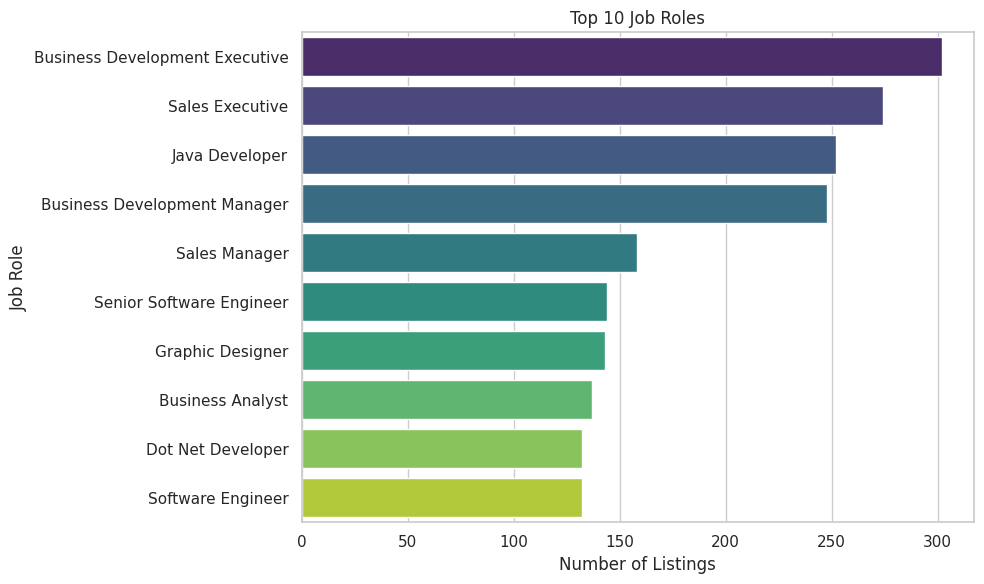

In [15]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# === 1. Top 10 Job Roles ===
top_roles = df['job_role'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_roles.values, y=top_roles.index, palette='viridis')
plt.title('Top 10 Job Roles')
plt.xlabel('Number of Listings')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

<ipython-input-16-1536c94046cf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')


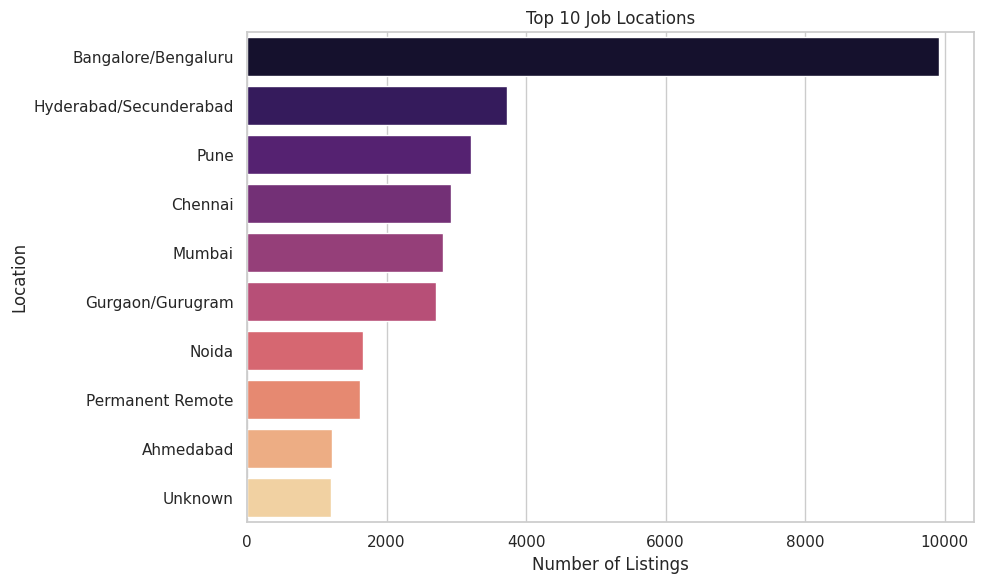

In [16]:
# === 2. Top 10 Locations ===
top_locations = df['location'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Listings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

<ipython-input-20-370d96c8bd66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df['avg_salary'] = (salary_df['salary_min'] + salary_df['salary_max']) / 2
<ipython-input-20-370d96c8bd66>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_role.values, y=avg_salary_by_role.index, palette='coolwarm')


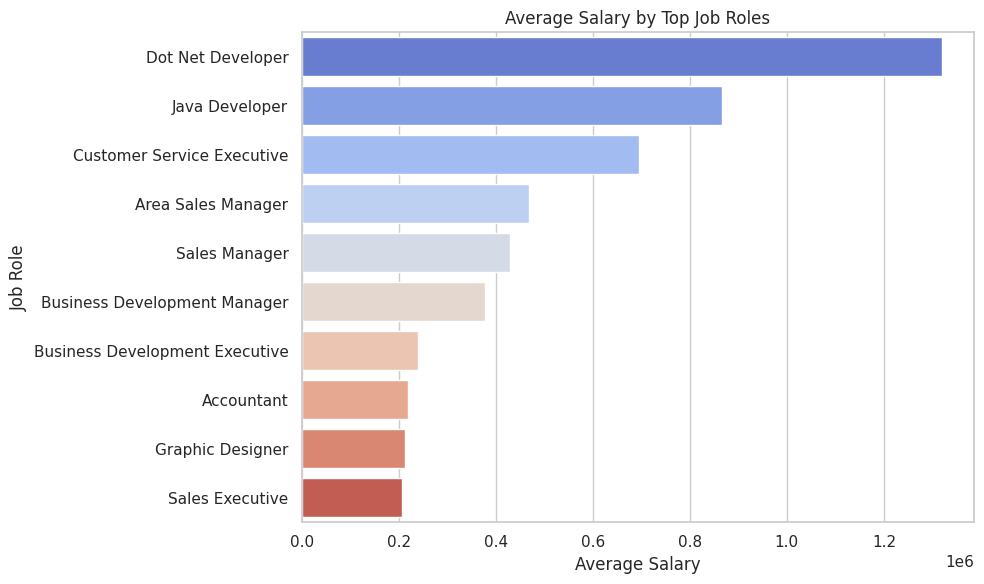

In [20]:
# === 3. Average Salary by Top Job Roles (with salary data) ===
# Filter for rows with salary data
salary_df = df.dropna(subset=['salary_min', 'salary_max'])

# Create a mean salary column
salary_df['avg_salary'] = (salary_df['salary_min'] + salary_df['salary_max']) / 2

# Calculate average salary for top job roles
top_salary_roles = salary_df['job_role'].value_counts().nlargest(10).index
avg_salary_by_role = salary_df[salary_df['job_role'].isin(top_salary_roles)].groupby('job_role')['avg_salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_role.values, y=avg_salary_by_role.index, palette='coolwarm')
plt.title('Average Salary by Top Job Roles')
plt.xlabel('Average Salary')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

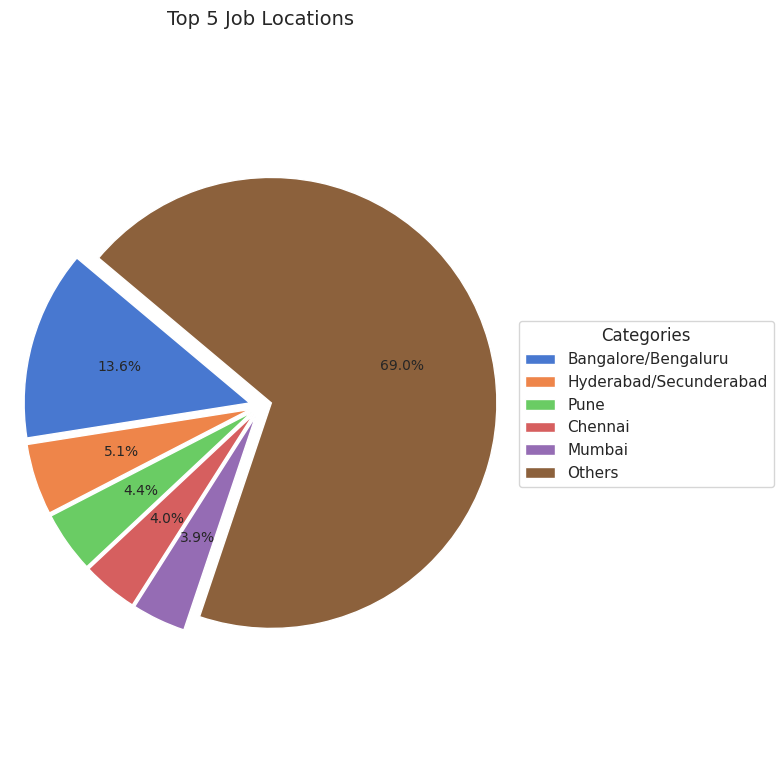

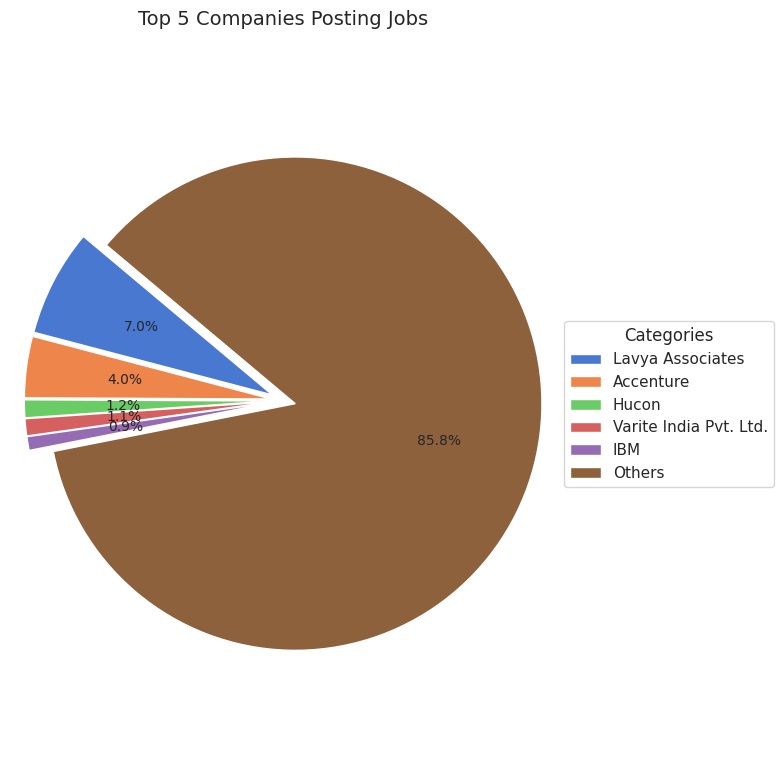

In [24]:


# Load cleaned data
df = pd.read_csv('jobs_cleaned.csv')

# Updated pie chart function with better labels
def plot_pie(series, title, top_n=5):
    top = series.value_counts().nlargest(top_n)
    others = series.value_counts().iloc[top_n:].sum()
    top['Others'] = others

    labels = top.index
    sizes = top.values
    explode = [0.05] * len(labels)  # Slightly explode all slices for clarity

    plt.figure(figsize=(8, 8))  # Bigger chart
    wedges, texts, autotexts = plt.pie(
        sizes,
        explode=explode,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 10}
    )
    plt.title(title, fontsize=14)
    plt.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# === Plot Pie Charts ===

plot_pie(df['location'], 'Top 5 Job Locations')
plot_pie(df['company'], 'Top 5 Companies Posting Jobs')


In [26]:
# === Top Job Roles ===
print("Top 10 Job Roles:")
print(df['job_role'].value_counts().head(10))

Top 10 Job Roles:
job_role
Business Development Executive    302
Sales Executive                   274
Java Developer                    252
Business Development Manager      248
Sales Manager                     158
Senior Software Engineer          144
Graphic Designer                  143
Business Analyst                  137
Dot Net Developer                 132
Software Engineer                 132
Name: count, dtype: int64


In [27]:
# === Top Locations ===
print("\nTop 10 Locations:")
print(df['location'].value_counts().head(10))


Top 10 Locations:
location
Bangalore/Bengaluru       9926
Hyderabad/Secunderabad    3728
Pune                      3211
Chennai                   2921
Mumbai                    2813
Gurgaon/Gurugram          2710
Noida                     1664
Permanent Remote          1623
Ahmedabad                 1215
Unknown                   1209
Name: count, dtype: int64


In [28]:
# === Top Companies ===
print("\nTop 10 Companies:")
print(df['company'].value_counts().head(10))


Top 10 Companies:
company
Lavya Associates          5128
Accenture                 2928
Hucon                      852
Varite India Pvt. Ltd.     815
IBM                        656
Megma Services             523
Infosys                    505
D'source                   502
RCPC                       444
Tekpillar Services         377
Name: count, dtype: int64


In [29]:
job_role_counts = df['job_role'].value_counts().reset_index()
job_role_counts.columns = ['job_role', 'count']
print(job_role_counts.head())


                         job_role  count
0  Business Development Executive    302
1                 Sales Executive    274
2                  Java Developer    252
3    Business Development Manager    248
4                   Sales Manager    158


In [37]:
import re
import numpy as np

def parse_posted_days(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    # Extract number
    match = re.findall(r'(\d+)', text)
    if match:
        return int(match[0])
    elif '30+' in text:
        return 30
    else:
        return np.nan

df['posted_days_ago'] = df['posted_on'].apply(parse_posted_days)


**Job Posting Trends Over Time**

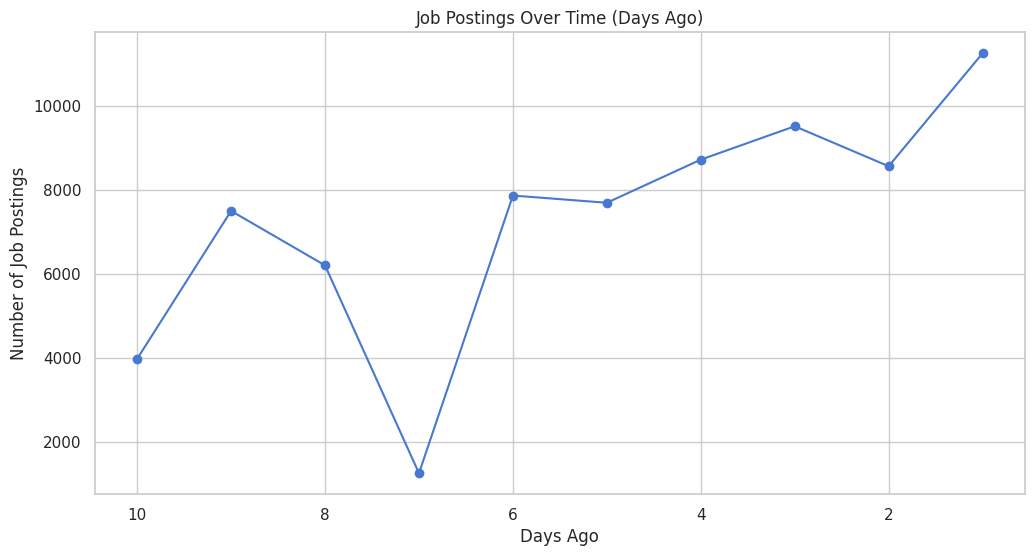

In [38]:
# Convert 'posted_on' to numeric days ago (assuming you have that parsed)
df['posted_days_ago'] = pd.to_numeric(df['posted_days_ago'], errors='coerce')

post_counts = df['posted_days_ago'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(post_counts.index, post_counts.values, marker='o')
plt.gca().invert_xaxis()  # Recent postings on right
plt.title('Job Postings Over Time (Days Ago)')
plt.xlabel('Days Ago')
plt.ylabel('Number of Job Postings')
plt.show()



Salary Prediction (Basic Regression)

RMSE: 1507630.2716540038


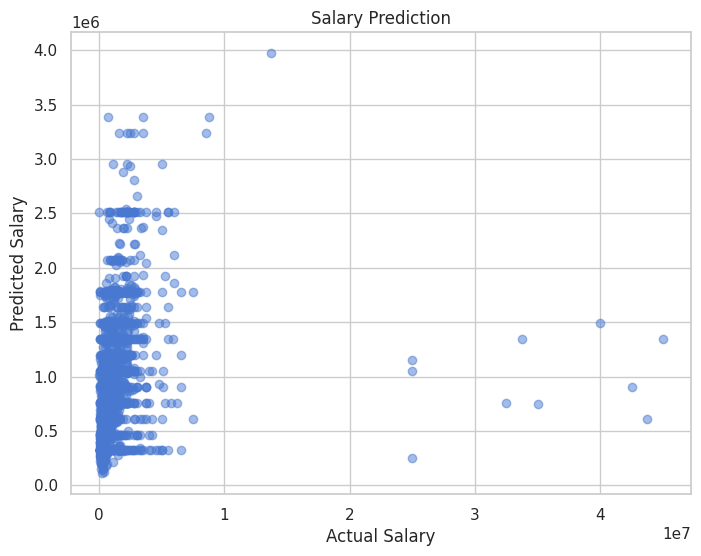

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np # Make sure numpy is imported for sqrt

# Create avg_salary column on the main DataFrame
df['avg_salary'] = (df['salary_min'] + df['salary_max']) / 2

# Prepare dataset, drop rows with missing values
model_df = df.dropna(subset=['avg_salary', 'exp_min', 'rating']).copy()

X = model_df[['exp_min', 'rating']]
y = model_df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Calculate MSE first
mse = mean_squared_error(y_test, y_pred)

# Then calculate RMSE by taking the square root of the MSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot actual vs predicted salary
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Salary Prediction')
plt.show()